<a href="https://colab.research.google.com/github/Peerada-Sukharom/data-analysis-portfolio/blob/main/Mini_Project_MultiLinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression Mini Project: Ecommerce Spending Prediction

### **Objective**
The oblectives is to predict customers’ yearly spending on an e-commerce platform using multiple linear regression based on their online behavior such as time on website, time on app, and session length.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

###Data preprocessing (Get Data + Manipulate Data)

In [ ]:
# read csv
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/My Drive/semester2_2566/Ecommerce Customers.csv"
df = pd.read_csv(data_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [ ]:
df.dtypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

In [ ]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [ ]:
#Check columns name
df.columns


Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

###Exploratory Data Analysis (EDA)

<ipython-input-10-b960f604176d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

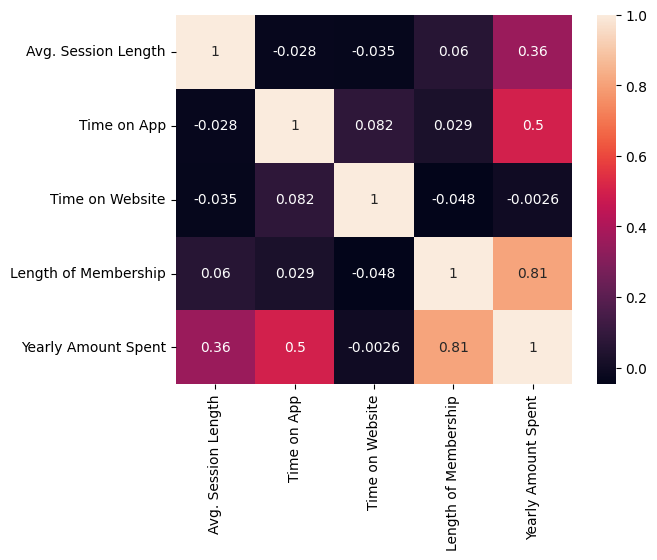

In [ ]:
#check the correlation between features in the dataset

sns.heatmap(df.corr(), annot = True)



### Training a Linear Regression Model

In [ ]:
# check column features
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [ ]:
# X array of features for training
X = df[['Avg. Session Length',	'Time on App',	'Time on Website',	'Length of Membership']]
X.head(3)

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543


In [ ]:
# y array with the target variable, in this case the "Yearly Amount Spent" column
y = df[['Yearly Amount Spent']]
y.head(3)

,Yearly Amount Spent
0,587.951054
1,392.204933
2,487.547505


###Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Using function "train_test_split()"
# Seperate dataset into 4 set: X_train, X_test, y_train and y_test
# test_size = 0.3 is mean seperate dataset into 70% for training and 30% for testing

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3)


In [ ]:
X_train.head(3)

,Avg. Session Length,Time on App,Time on Website,Length of Membership
293,33.794756,10.982806,34.810631,3.201802
202,31.525752,11.340036,37.039514,3.811248
415,31.517122,10.745189,38.791235,1.428824


In [ ]:
X_test.head(3)

,Avg. Session Length,Time on App,Time on Website,Length of Membership
163,30.879484,13.280432,36.936159,3.585161
161,33.503705,12.399436,35.012806,0.968622
481,32.047815,12.482670,35.536025,3.393903


In [ ]:
y_train.head(3)

,Yearly Amount Spent
293,451.727863
202,443.965627
415,275.918421


In [ ]:
y_test.head(3)

,Yearly Amount Spent
163,490.206600
161,357.591439
481,497.389558


###Creating and Training the Model

In [ ]:
#import package model Linear regression
from sklearn.linear_model import LinearRegression

In [ ]:
# Create an instance of a linear regression model
model = LinearRegression()

In [ ]:
#fit it to the data with the fit() function:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Get results
#Once you have your model fitted, you can get the results to verify that the model performs as expected and to interpret it.
#You can obtain the coefficient of determination, 𝑅², with .score() called on model:
# 𝑅²
print('Coefficient of determination: 𝑅² or Accuracy of Model Training :',model.score(X_train, y_train))
print('Coefficient of determination: 𝑅² or Accuracy of Model Testing :',model.score(X_test, y_test))


Coefficient of determination: 𝑅² or Accuracy of Model Training : 0.9830034633389019
Coefficient of determination: 𝑅² or Accuracy of Model Testing : 0.9867384896547818


### **Results**
The model achieved good predictive performance and revealed that Time on App had the strongest impact on yearly spending, suggesting that mobile engagement plays a key role in customer spending behavior.

In [ ]:
#Predictin "Yearly Amount Spent" via using model
y_prediction = model.predict(X_test)

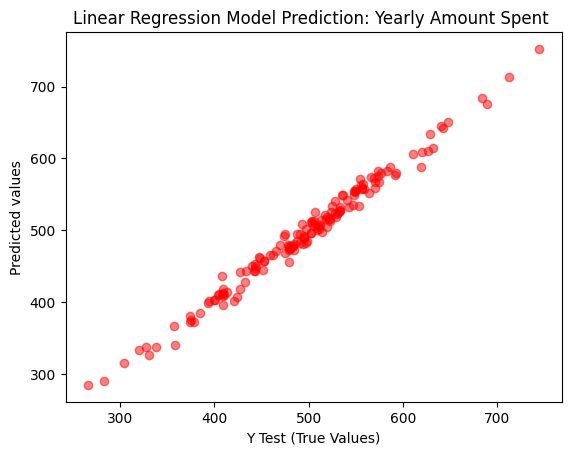

In [ ]:
#Matplotlib: Scatter plot
plt.scatter(y_test,y_prediction, color='r', alpha=0.5)
plt.title("Linear Regression Model Prediction: Yearly Amount Spent ")
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted values')
plt.show()

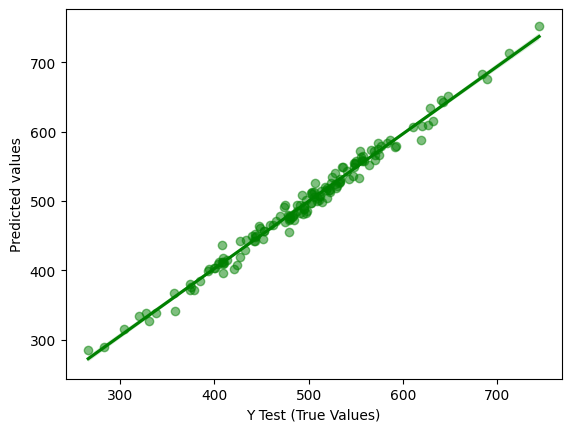

In [ ]:
#seaborn.regplot
#Plot data and a linear regression model fit.
sns.regplot(x = y_test,y = y_prediction, color='g',scatter_kws={'alpha':0.5})
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted values')
plt.show()